# Ch5

In [22]:
import numpy as np
import pandas as pd
import scipy as sp
from  scipy import stats

from matplotlib import  pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline
%precision 3

np.random.seed(1)

In [23]:
# 母集団の設定(m=4 var=0.8のガウス分布)
pop=stats.norm(loc=4,scale=0.8)

In [24]:
# サンプル数10の標本を10000回とり、その平均を格納
N_SAMS=10000
N_SAM=10
sam_mean_arr=np.array(
[
    np.mean(pop.rvs(size=N_SAM)) for _  in range(N_SAMS) 
])


In [25]:
np.mean(sam_mean_arr)

4.004202422791747

In [26]:
sp.std(sam_mean_arr,ddof=1)

0.2513580850860402

/Users/hasehiro/.pyenv/versions/3.6.5/envs/pycoon/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


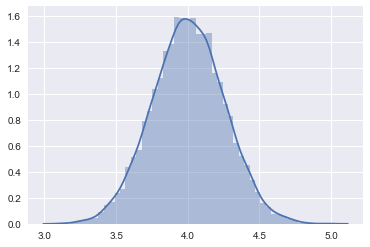

In [27]:
sns.distplot(sam_mean_arr)

In [61]:
# ガウス分布の特徴: サンプル数が多くなるに従って、本当の平均に近づく(一致性)

size_array=np.arange(start=10,stop=10010,step=100)
sam_array=np.array(
[
    sp.mean(pop.rvs(size=size)) for size in size_array
])

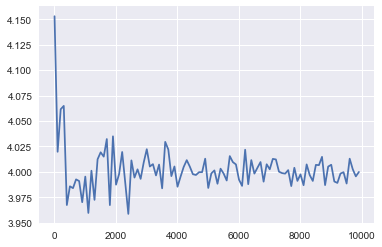

In [62]:
plt.plot(size_array,sam_array)

In [55]:
# nのサンプル数の平均を返す
f_sam_mean=lambda size,trial:pd.DataFrame({
    'size':np.tile(f'size{size}',trial),
    'sam_mean':[sp.mean(pop.rvs(size=size)) for _ in range(trial) ]
})

In [57]:
# サンプル数10,20,30で標本平均を導出
sim_result=pd.concat([
    f_sam_mean(10,10000),
    f_sam_mean(20,10000),
    f_sam_mean(30,10000)
])

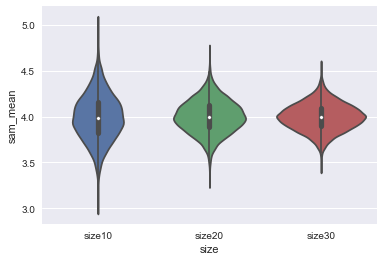

In [58]:
sns.violinplot(x='size',y='sam_mean',data=sim_result)

In [67]:
# ガウス分布の特徴:標本が多くなるに従って、標本平均の標本偏差が小さくなることを確認

trial=100
size_array=np.arange(start=10,stop=10010,step=100)
sam_array_std=np.array(
[
    sp.std([sp.mean([pop.rvs(size=size) ]) for _ in range(trial)]
          )for size in size_array])

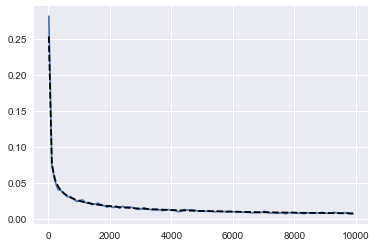

In [72]:
# 標本誤差(理論上の、標本平均の標本偏差)と重ね合わせてplot

std_error=[0.8/sp.sqrt(size) for  size in size_array]
plt.plot(size_array,sam_array_std)
plt.plot(size_array,std_error,'k--' )

In [73]:
# ガウス分布の特徴: 標本分散の標本平均はサンプル数が多くなるにつれ、母集団の分散に近づく(不偏性)
trial=100
size_array=np.arange(start=10,stop=10010,step=100)
sam_array_std_mean=np.array(
[
    sp.mean([sp.std([pop.rvs(size=size) ]) for _ in range(trial)]
          )for size in size_array])

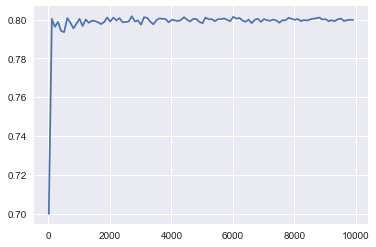

In [74]:
plt.plot(size_array,sam_array_std_mean)

In [78]:
# 中心極限定理: 母集団分布がなんであっても、サンプルサイズが大きいときは、確率変数の和(平均値)はガウス分布に近づく

n_size=10000
n_trial=50000

coin=np.array([0,1])

count_coin=[
 sp.sum(np.random.choice(coin,size=n_size,replace=True))  for _ in range (n_trial)
]

/Users/hasehiro/.pyenv/versions/3.6.5/envs/pycoon/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


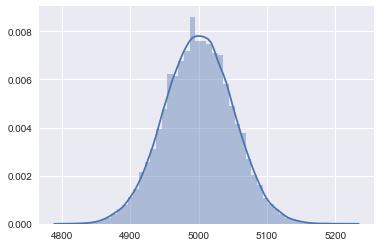

In [79]:
sns.distplot(count_coin)